<a href="https://colab.research.google.com/github/subo-rodrigo/computer_vision_assig_249324H/blob/main/uom_assi_cv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

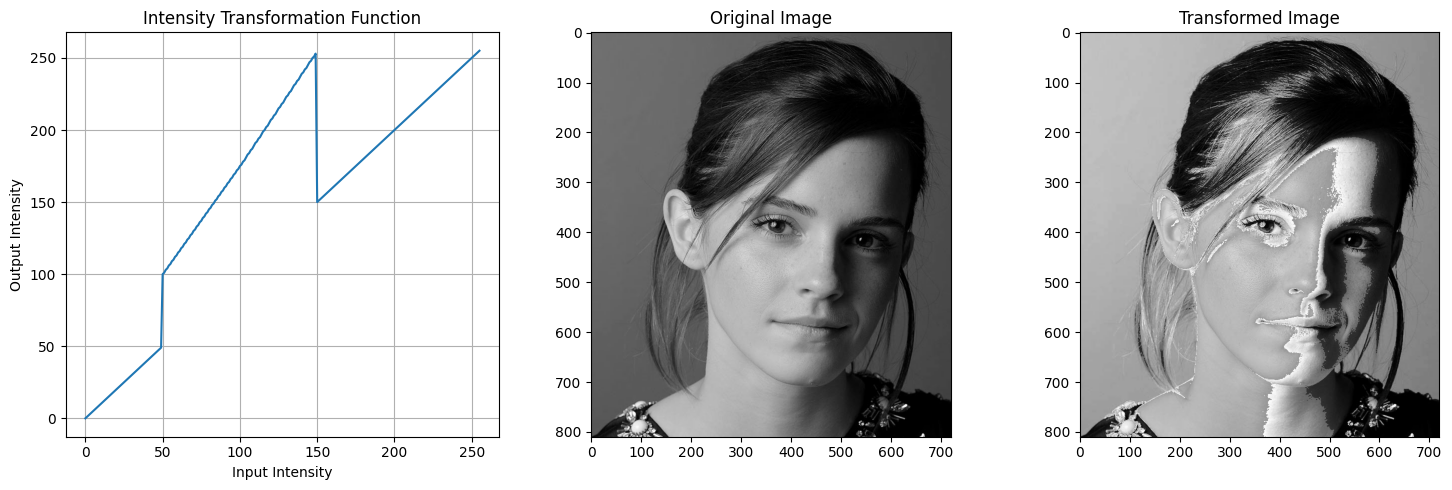

In [5]:
####1 Question
import cv2
import numpy as np
import matplotlib.pyplot as plt

def custom_intensity_transform(image):
    # Define transformation points
    input_points = np.array([0, 50, 50,100, 150, 150,200, 255])
    output_points = np.array([0, 50,100, 175, 255, 150,200, 255])
    lut = np.interp(np.arange(256), input_points, output_points).astype(np.uint8)

    transformed = cv2.LUT(image, lut)
    return transformed, lut


image = cv2.imread('/content/drive/MyDrive/Colab Notebooks/uom_cv/a1images/emma.jpg', cv2.IMREAD_GRAYSCALE)
transformed_image, lut = custom_intensity_transform(image)


plt.figure(figsize=(15, 5))

# Intensity transformation graph
plt.subplot(131)
plt.plot(range(256), lut)
plt.title('Intensity Transformation Function')
plt.xlabel('Input Intensity')
plt.ylabel('Output Intensity')
plt.grid(True)

# Original image
plt.subplot(132)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

# Transformed image
plt.subplot(133)
plt.imshow(transformed_image, cmap='gray')
plt.title('Transformed Image')

plt.tight_layout()
plt.show()

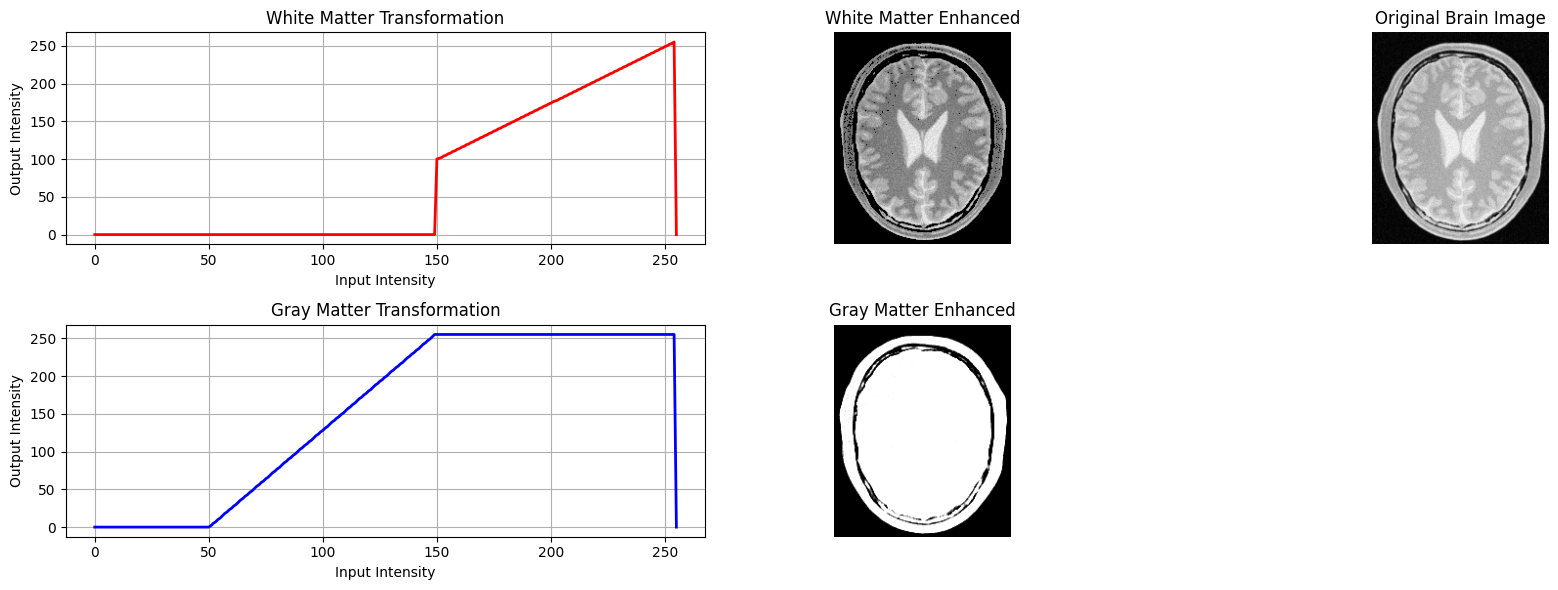

In [32]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def accentuate_white_matter(image):
    # enhance white matter
    lut = np.zeros(256, dtype=np.uint8)
    lut[150:255] = np.linspace(100, 255, 105).astype(np.uint8)
    return cv2.LUT(image, lut), lut

def accentuate_gray_matter(image):
    #enhance gray matter
    lut = np.zeros(256, dtype=np.uint8)
    lut[50:150] = np.linspace(0, 255, 100).astype(np.uint8)
    lut[150:255] = 255
    return cv2.LUT(image, lut), lut

brain_image = cv2.imread('/content/drive/MyDrive/Colab Notebooks/uom_cv/a1images/brain_proton_density_slice.png', cv2.IMREAD_GRAYSCALE)

white_enhanced, white_lut = accentuate_white_matter(brain_image)
gray_enhanced, gray_lut = accentuate_gray_matter(brain_image)

plt.figure(figsize=(18, 6))

plt.subplot(2, 3, 1)
plt.plot(range(256), white_lut, 'r-', linewidth=2)
plt.title('White Matter Transformation')
plt.xlabel('Input Intensity')
plt.ylabel('Output Intensity')
plt.grid(True)


plt.subplot(2, 3, 2)
plt.imshow(white_enhanced, cmap='gray')
plt.title('White Matter Enhanced')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.plot(range(256), gray_lut, 'b-', linewidth=2)
plt.title('Gray Matter Transformation')
plt.xlabel('Input Intensity')
plt.ylabel('Output Intensity')
plt.grid(True)

plt.subplot(2, 3, 5)
plt.imshow(gray_enhanced, cmap='gray')
plt.title('Gray Matter Enhanced')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(brain_image, cmap='gray')
plt.title('Original Brain Image')
plt.axis('off')

plt.tight_layout()
plt.show()